In [22]:
# Get all the variables
data_path = '../data/dl_challenge'

In [23]:
# Inside the data path there are so many folders of hash values, I want to store them in a list
import os
def get_hashes(data_path):
    """
    Get all the hash values from the data path.
    :param data_path: Path to the data directory.
    :return: List of hash values.
    """
    hashes = []
    for root, dirs, files in os.walk(data_path):
        for dir_name in dirs:
            hashes.append(dir_name)
    return hashes

hashes = get_hashes(data_path)
# Print the number of hashes found
print(f"Number of hashes found: {len(hashes)}")
# Print the first 10 hashes
print("First 10 hashes:", hashes[:10])


Number of hashes found: 200
First 10 hashes: ['8658b670-9915-11ee-9103-bbb8eae05561', 'a0818baa-9915-11ee-9103-bbb8eae05561', '94855ef3-9915-11ee-9103-bbb8eae05561', '95c679cc-9915-11ee-9103-bbb8eae05561', '8658b66d-9915-11ee-9103-bbb8eae05561', '9f50f3c3-9915-11ee-9103-bbb8eae05561', '859074c6-9915-11ee-9103-bbb8eae05561', '878250d0-9915-11ee-9103-bbb8eae05561', '9bccdb81-9915-11ee-9103-bbb8eae05561', '94855efa-9915-11ee-9103-bbb8eae05561']


In [24]:
# name of the file inside each hash folder
bbox_file = 'bbox3d.npy'
seg_file = 'mask.npy'
pcl_file = 'pc.npy'
rgb_file = 'rgb.jpg'

In [25]:
# Get one hash to test the file structure of all the files
import numpy as np
import os
import matplotlib.pyplot as plt

def get_sample_data(data_path, hash_value):
    """
    Get sample data for a given hash value.
    :param data_path: Path to the data directory.
    :param hash_value: Hash value to get the sample data for.
    :return: Dictionary with sample data.
    """
    hash_path = os.path.join(data_path, hash_value)
    sample_data = {
        'bbox': np.load(os.path.join(hash_path, bbox_file)),
        'seg': np.load(os.path.join(hash_path, seg_file)),
        'pcl': np.load(os.path.join(hash_path, pcl_file)),
        'rgb': plt.imread(os.path.join(hash_path, rgb_file))
    }
    return sample_data

# Get sample data for the first hash
sample_hash = hashes[0]
sample_data = get_sample_data(data_path, sample_hash)
# Print the sample data keys and types
print("Sample data keys and types:")
for key, value in sample_data.items():
    print(f"{key}: {type(value)}", f"shape: {value.shape if isinstance(value, np.ndarray) else 'N/A'}")



Sample data keys and types:
bbox: <class 'numpy.ndarray'> shape: (12, 8, 3)
seg: <class 'numpy.ndarray'> shape: (12, 630, 981)
pcl: <class 'numpy.ndarray'> shape: (3, 630, 981)
rgb: <class 'numpy.ndarray'> shape: (630, 981, 3)


(630, 981, 3)


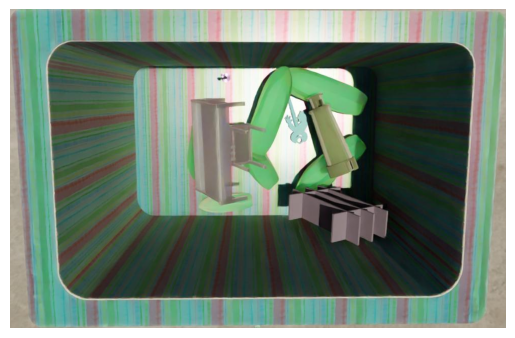

In [26]:
# Visualize the RGB image
import matplotlib.pyplot as plt
def visualize_rgb_image(img):
    """
    Visualize the RGB image.
    :param rgb_path: Path to the RGB image.
    """
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# print the rgb size
def print_rgb_size(rgb_path):
    """
    Print the size of the RGB image.
    :param rgb_path: Path to the RGB image.
    """
    img = plt.imread(rgb_path)
    print(f"RGB image size: {img.shape}")

print(sample_data['rgb'].shape)
# Visualize the RGB image for the sample data
visualize_rgb_image(sample_data['rgb'])



In [27]:
import open3d as o3d

# 1. Load
pc_img = sample_data['pcl']

# 2. Reshape into N×3:
# Method A: move channels to the last dim, then flatten
pc = np.moveaxis(pc_img, 0, -1)      # shape = (631, 796, 3)
points = pc.reshape(-1, 3)           # shape = (631*796, 3)
print("reshaped to:", points.shape)


# Create point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Create coordinate frame
axis = o3d.geometry.TriangleMesh.create_coordinate_frame(
    size=0.5,      # scale of the axis
    origin=[0, 0, 0]  # where to place the axis
)

# Visualize point cloud with axis
o3d.visualization.draw_geometries([pcd, axis])


reshaped to: (618030, 3)


In [28]:
# Get bbox shape
sample_data['bbox'].shape

(12, 8, 3)

In [29]:
sample_data['bbox']

array([[[ 2.47678049e-02,  1.61301866e-02,  9.97863173e-01],
        [ 1.29263485e-02,  1.63505003e-02,  9.80689883e-01],
        [-5.55844158e-02, -4.39458527e-02,  1.02715623e+00],
        [-4.37430181e-02, -4.41661365e-02,  1.04432952e+00],
        [ 4.02636342e-02, -9.96881723e-03,  9.86843526e-01],
        [ 2.84222644e-02, -9.74852219e-03,  9.69670296e-01],
        [-4.00886163e-02, -7.00447857e-02,  1.01613665e+00],
        [-2.82472204e-02, -7.02651888e-02,  1.03330994e+00]],

       [[-3.90931964e-02, -9.48030129e-02,  1.01254988e+00],
        [-5.69152907e-02, -9.02332738e-02,  9.82146144e-01],
        [ 4.92023639e-02,  4.15972285e-02,  9.39756274e-01],
        [ 6.70245215e-02,  3.70274782e-02,  9.70160067e-01],
        [-7.29363486e-02, -5.94744757e-02,  1.03769803e+00],
        [-9.07584131e-02, -5.49047664e-02,  1.00729418e+00],
        [ 1.53592676e-02,  7.69257694e-02,  9.64904547e-01],
        [ 3.31812762e-02,  7.23560750e-02,  9.95308280e-01]],

       [[ 8.32775906

In [30]:
# Try second hash
sample_hash_2 = hashes[1]
sample_data_2 = get_sample_data(data_path, sample_hash)

# Print the sample data keys and types for the second hash
print("Sample data keys and types for second hash:")
for key, value in sample_data_2.items():
    print(f"{key}: {type(value)}", f"shape: {value.shape if isinstance(value, np.ndarray) else 'N/A'}")

Sample data keys and types for second hash:
bbox: <class 'numpy.ndarray'> shape: (12, 8, 3)
seg: <class 'numpy.ndarray'> shape: (12, 630, 981)
pcl: <class 'numpy.ndarray'> shape: (3, 630, 981)
rgb: <class 'numpy.ndarray'> shape: (630, 981, 3)


In [31]:
# Data analysis
# So we have bbox: (16,8,3) => 16 boxes, each with 8 points in 3D space
# seg: (16, 631, 796) => 16 segments, each with 631x796 pixels
# pcl: (631, 796, 3) => point cloud with 631x796 points in 3D space
# rgb: (631, 796, 3) => RGB image with 631x796 pixels


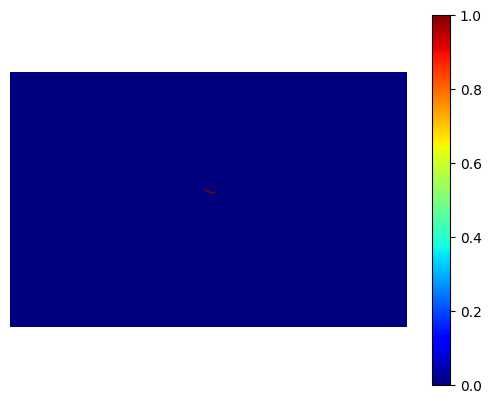

In [32]:
# Let's visualize the segmentation mask
def visualize_segmentation_mask(segmentation_mask):
    """
    Visualize the segmentation mask.
    :param segmentation_mask: Segmentation mask as a numpy array.
    """
    plt.imshow(segmentation_mask, cmap='jet')
    plt.colorbar()
    plt.axis('off')
    plt.show()

visualize_segmentation_mask(sample_data['seg'][0])  # Visualize the first segmentation mask

<class 'numpy.ndarray'>


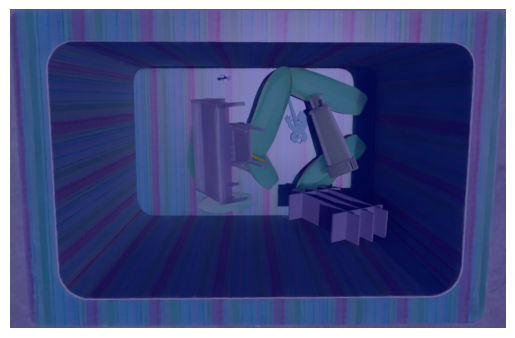

In [34]:
# Visualize all segmentation masks with rgb overlay
def visualize_segmentation_with_rgb(img, segmentation_mask):
    """
    Visualize the segmentation mask overlaid on the RGB image.
    :param rgb_image: RGB image as a numpy array.
    :param segmentation_mask: Segmentation mask as a numpy array.
    """
    print(type(img))
    plt.imshow(img)
    plt.imshow(segmentation_mask, alpha=0.5, cmap='jet')  # Overlay segmentation mask
    plt.axis('off')
    plt.show()
    
visualize_segmentation_with_rgb(sample_data['rgb'], sample_data['seg'][0])  # Visualize the first segmentation mask overlaid on the RGB image

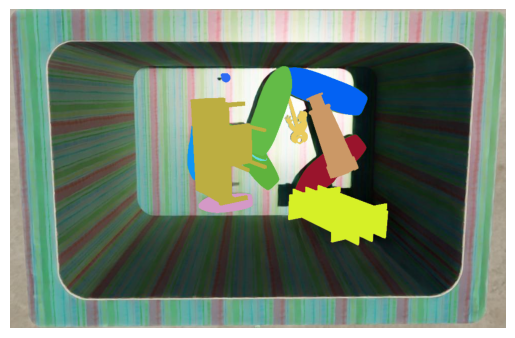

In [35]:
# Visualize all segmentation masks with rgb overlay
def visualize_all_segmentations_with_rgb(img, segmentation_masks) -> np.ndarray:
    """
    Visualize all segmentation masks overlaid on the RGB image.
    :param rgb_image: RGB image as a numpy array.
    :param segmentation_masks: List of segmentation masks as numpy arrays.
    """
    # plt.imshow(img)
    
    # randomize the color for each segmentation mask
    # We will create a new image to hold the overlay of all segmentation masks
    np.random.seed(42)  # For reproducibility
    # Randomize the mask colors rgb from 0 to 255
    # create a list of random colors
    colors = np.random.randint(0, 256, size=(len(segmentation_masks), 3), dtype=np.uint8)

    # The segmentation_masks are in the shape (16, 631, 796), we need to iterate over them
    # but we only want to visualize the pixel that is true only for each mask
    # Create new image to hold the overlay
    overlay = np.zeros_like(img)
    i = 0
    for mask in segmentation_masks:
        # Create a color mask for the current segmentation
        color_mask = np.zeros_like(img)
        color_mask[mask > 0] = colors[i]  # Assign the random color to the mask pixels
        overlay += color_mask  # Add to overlay
        # overlay = np.clip(overlay, 0, 1)  # Ensure values are between 0 and 1 for display
        i = i + 1

    new_img = np.zeros_like(img)
    # Combine the overlay with the original image each pixel
    for i in range(overlay.shape[0]):
        for j in range(overlay.shape[1]):

            if np.any(overlay[i, j] > 0):
                new_img[i, j] = overlay[i, j]
            else:
                new_img[i, j] = img[i, j]
    plt.imshow(new_img)
    plt.axis('off')
    plt.show()
    return new_img
output_seg = visualize_all_segmentations_with_rgb(sample_data['rgb'], sample_data['seg'])  # Visualize all segmentation masks overlaid on the RGB image

In [36]:
class RGBPointCloudVisualizer:
    """
    A class to visualize a point cloud with RGB colors in Open3D.

    Attributes:
        pcl (np.ndarray): Point cloud data of shape (3, H, W).
        rgb (np.ndarray): RGB image data of shape (H, W, 3).
    """

    def __init__(self, pcl: np.ndarray, rgb: np.ndarray):
        # Validate shapes
        if pcl.ndim != 3 or pcl.shape[0] != 3:
            raise ValueError(f"pcl must be a numpy array with shape (3, H, W), got {pcl.shape}")
        if rgb.ndim != 3 or rgb.shape[2] != 3:
            raise ValueError(f"rgb must be a numpy array with shape (H, W, 3), got {rgb.shape}")
        if pcl.shape[1:] != rgb.shape[:2]:
            raise ValueError("Spatial dimensions of pcl and rgb must match.")

        self.pcl = pcl
        self.rgb = rgb

    def create_point_cloud(self) -> o3d.geometry.PointCloud:
        """
        Converts the pcl and rgb arrays into an Open3D PointCloud object with colors.

        Returns:
            o3d.geometry.PointCloud: The colored point cloud.
        """
        # Flatten the arrays
        H, W = self.rgb.shape[:2]
        num_points = H * W
        points = self.pcl.reshape(3, num_points).T  # (N, 3)
        colors = self.rgb.reshape(num_points, 3).astype(np.float64) / 255.0  # normalize to [0,1]

        # Create Open3D point cloud
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points)
        pcd.colors = o3d.utility.Vector3dVector(colors)
        return pcd

    def visualize(self, window_name: str = "RGB Point Cloud"):
        """
        Visualizes the colored point cloud in an Open3D window.

        Args:
            window_name (str): Title of the visualization window.
        """
        pcd = self.create_point_cloud()
        o3d.visualization.draw_geometries([pcd], window_name=window_name)

In [37]:
pc = sample_data['pcl']
rgb = sample_data['rgb']
visualizer = RGBPointCloudVisualizer(pc, output_seg)
visualizer.visualize()

In [54]:
# Create the bounding box in open3d
import numpy as np
import open3d as o3d

class BBoxVisualizer:
    def __init__(self, pcl: np.ndarray, bbox: np.ndarray, rgb: np.ndarray = None):
        """
        pcl: (3, H, W) numpy array of XYZ coordinates
        bbox: (N, 8, 3) numpy array of box corner coordinates
        rgb: (H, W, 3) optional color image for the points
        """
        # flatten point cloud into (num_pts, 3)
        H, W = pcl.shape[1], pcl.shape[2]
        pts = pcl.reshape(3, -1).T  # (H*W, 3)
        self.pcd = o3d.geometry.PointCloud()
        self.pcd.points = o3d.utility.Vector3dVector(pts)

        if rgb is not None:
            colors = (rgb.reshape(-1, 3) / 255.0).astype(np.float64)
            self.pcd.colors = o3d.utility.Vector3dVector(colors)

        self.boxes = []
        for corners in bbox:
            self.boxes.append(self._make_lineset(corners))

    def _make_lineset(self, corners: np.ndarray) -> o3d.geometry.LineSet:
        """
        Given 8 corners in object coord order, build a LineSet connecting edges.
        corners: (8, 3) array
        """
        # Define the 12 edges of a box by index pairs
        lines = [
            [0,1], [1,2], [2,3], [3,0],  # bottom face
            [4,5], [5,6], [6,7], [7,4],  # top face
            [0,4], [1,5], [2,6], [3,7],  # vertical edges
        ]
        colors = [[1, 0, 0] for _ in lines]  # red boxes
        ls = o3d.geometry.LineSet(
            points=o3d.utility.Vector3dVector(corners),
            lines=o3d.utility.Vector2iVector(lines)
        )
        ls.colors = o3d.utility.Vector3dVector(colors)
        return ls

    def visualize(self, line_width: float = 5.0):
        print('test')
        vis = o3d.visualization.Visualizer()
        vis.create_window()
        vis.add_geometry(self.pcd)
        for box in self.boxes:
            vis.add_geometry(box)
        opt = vis.get_render_option()
        opt.line_width = 5.0  # increase from default (1.0)
        vis.run()
        vis.destroy_window()


In [55]:
visualizer_bbox = BBoxVisualizer(pc, sample_data['bbox'], output_seg)
visualizer_bbox.visualize()

test
